In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

from sklearn.ensemble.forest import RandomForestRegressor

sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (12, 9), 
        "axes.titlesize" : 18 
    }
)

In [2]:
df = pd.read_csv('J:/HiEnd/mlcourse_open-master (2)/mlcourse_open-master/data/mlbootcamp5_train.csv', sep=';', 
                 index_col='id')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df = df[df['ap_lo'] <= df['ap_hi']]
filtered_df = df[(df['ap_lo'] <= df['ap_hi']) & 
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) & 
                 (df['weight'] <= df['weight'].quantile(0.975))]
print(filtered_df.shape[0] / df.shape[0])

0.9179827240205916


In [4]:
df['age_years'] = (df.age / 365.25).astype('int')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68766 entries, 0 to 99999
Data columns (total 13 columns):
age            68766 non-null int64
gender         68766 non-null int64
height         68766 non-null int64
weight         68766 non-null float64
ap_hi          68766 non-null int64
ap_lo          68766 non-null int64
cholesterol    68766 non-null int64
gluc           68766 non-null int64
smoke          68766 non-null int64
alco           68766 non-null int64
active         68766 non-null int64
cardio         68766 non-null int64
age_years      68766 non-null int32
dtypes: float64(1), int32(1), int64(11)
memory usage: 7.1 MB


In [14]:
def rdf( df_name, target_name, drop_list={} ):
    """
    Оборачиваем лес в фукнцию (люблю я это дело) 
    которая принимает:
    df_name - ссылку на датафрейм
    target_name - предсказываем параметр
    drop_list - список параметров на дроп
    которая возвращает:
    оценку влияния признаков на решение модели
    график распределения значимости признаков
    P.S dummies кодирование пока пропустил, не факт что он здесь нужно
    Есть небольшой момент который можно принять за неправильность - это не так.
    фукнция принтит список с признаками в порядке убывания, чтоже до графика то нумерация это:
    features = df_name.columns, который лист из int и в котором ap_hi по счету 5ый, что кмк удобно
    """
    features = df_name.columns
    forest = RandomForestRegressor(n_estimators=1000, max_features=10, random_state=0)
    forest.fit(df_name.drop(drop_list, axis=1),  df_name[target_name])
    importances = forest.feature_importances_
    indices = np.argsort(importances)[::-1]
    num_to_plot = 10
    feature_indices = [ind+1 for ind in indices[:num_to_plot]]
    for pony in range(num_to_plot):
        print(pony + 1, features[(feature_indices[pony])], importances[indices[pony]])
    plt.figure(figsize=(15,5))
    plt.title("Ценность признаков с точки зрения модели")

    bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
               color=([str(i/float(num_to_plot+1))               
               for i in range(num_to_plot)]), 
               align="center")

    ticks = plt.xticks(range(num_to_plot), feature_indices)

    plt.xlim([-1, num_to_plot])
    plt.legend(bars, [features[i] for i in feature_indices]);
    return plt.show()

1 ap_hi 0.230738648271
2 weight 0.217895758083
3 height 0.200872354693
4 cardio 0.155239426701
5 ap_lo 0.0621967227775
6 cholesterol 0.0399111512254
7 gender 0.0266605397527
8 gluc 0.0238500676626
9 active 0.0194802077408
10 smoke 0.0129682032984


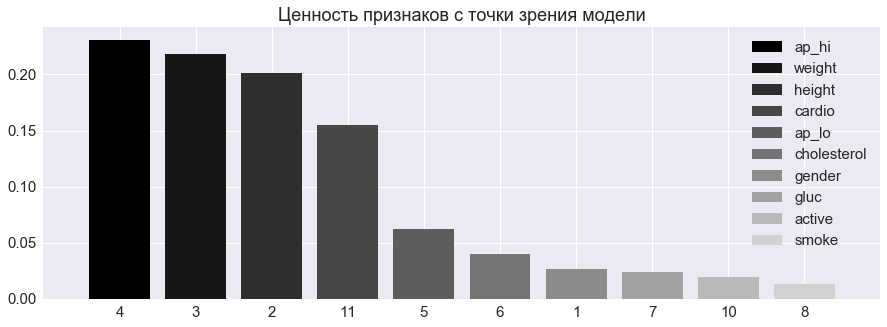

In [15]:
rdf(df, 'cardio', {'age','cardio})

In [ ]:
Уважаемые работадатели и начальники отделов, Здравствуйте;
Давайте знакомиться без купюр, лирики и лишних разочарований.
Кто осилит эту стену текста и поймёт, станет моим начальником.

Я умею писать собственный код на стыке Python, Pandas и sklearn, а также:
- проводить код ревью, документировать и оборачивать чужой код в функции.

Масштаб трагедии такой, что последний год в чатике ru_python_beginners
админы конфы пингуют меня, когда появляеться очередной новичок и аскает:
про Pandas, матан, тестовые задания которые вы им даёте и прочий ML_треш.
Специально для них я даже гайд написал, который висит в FAQ нашей группы.

Всё, чего я от жизни хочу - это писать код на python, под Pandas и sklearn.
Для этой цели я периодически пытаюсь устроиться в офис, работать за деньги.
Один раз устроился, плюс посчитал несколько кейсов для заказчкиков удалённо.

Сейчас я снова хочу попытать счастья и попробовать устроиться на работу мечты.
Для этой цели я отправлю вам резюме и переборов свои комплексы пойду на интервью.

Все будут ждать, что в переговорке появится внешне компетентнный, уверенный в себе 33
летний мужик, который с полпинка напишет регуляризацию или SQL запрос на бумажке;
или по памяти перечислит все существующие метрики всех существующих ML моделей.

Вместо этого мифического персонажа, которого я не встречал...

К вам приду я: мальчик-лапочка непонятной наружности с глазками впол, плакса, хикка,
социопат и длинноволосый анимешник в шапочке с ушками, которую я скрипя сердцем 
сниму и засуну на время собеседования в сумку. Щито поделать! десу!

В связи с чем я не смогу адекватно ответить на ваш вопрос: расскажите о себе или написать
на бумажке кусок кода на T-SQL или перечислить все метрики, сейчас я помню только две:
gini и энтропию Шеннона, у меня играет: https://youtu.be/fuMnHItjNEs и я только что
снова обернул в функцию кусок годноты, потом куда нибудь вставлю.

У меня нет проблем ходитьт в офис на фулл-тайм, я буду рад вырваться из своей домашней крепости.
Познакомиться с новыми людьми, подружиться, влиться в коллектив и вообще двигаться вперёд.

Но сказать вам об этом я не могу. Как и у любого человека, у меня есть чувства и причины
что бы в итоге, где то в районе 30 ти лет оказаться один на один со своими демонами.

Для того, чтобы всё это преодолеть я освоил новую профессию и изменил себя.
Селфимпрувмент как он есть, результат неодназначен, но мне нравиться.

В результате:

Фукнция выше считает ценность признаков в выборке с помощью случайного леса,
- результатам, полученным ранее на бинарном классификаторе не противоречит.

У меня хорошее пространственное воображение и когда я говорю: в пространстве
мгномерной кривизны на многократно искривлённой плоскости, разделённым кривой
валяются разноцветные шарики относящиеся к классу признаков по цвету и числу..

Мой мозг спамит меня этой 3D картинкой ещё до того как, я договорил эту фразу.
Он вообще много чем меня спамит против моей воли, но я не собираюсь про всё это
жаловаться своим коллегам и ныть про всякое разное. Не вижу смысла грузить людей.

Ещё я умею залипать в комп по несколько дней с неодназначным результатом. Раньше 
думал что все программисты так могут, окзазалось, что на всю конфу нас таких двое.

..в резюме, вообщем много всего написаное про прошлую жизнь, как всё это делать я
помню, если подумать то я и половину не написал из своего прошлого опыта, но теперь
всё это как бы не очень важно. я наконец нашёл себе занятие по душе, Конфуций был прав.

На интервью я ношу внешний диск с анакодой и пачкой тетрадок юпитер и предлагаю всем их
смотреть, за 2018 год нашёлся только один желающий, он же взял меня на работу... но там
я поругался из-за того что был единственным человеком, который отвечал за кучу всего и 
меня пинали фактическо подруку и сильно за рамками допустимой культуры общения и речи.

Впрочем дело я сделал и дела компании выправились.

Потом я разрыдался в кабинете ген.директора (перед этим я сидел и молча давился слезами
за монитором в офисе несколько дней, мне нужно было закончить сложную логическую модель)
- и он сказал что бы я увольнялся, потому что моего начальника могила исправит, а я нет.

А потом я прихожу на интервью и 10 Хаеров из 10 задают мне вопрос - почему вы уволились?

https://youtu.be/PylohSp_AY0
    
Вообщем всё сложно и просто. Скилл растёт, флагманы стабильно отказывают, в других местах
либо долгие разговоры про то - какое я говно и какой напротив меня сидит молодой бог, либо
- спасибо, мы вам перезвоним, потому что мы не читали ваш гит, не хотим смотреть ваш код и
по умолчанию считаем вас дном. 

Я как то раз спросил особо выдающегося персонажа, который мне на интервью 20 минут задвигал
про своё супер профильное образование в DS - как работает энтропия Шеннона в дереве решений.
В ответ услышал мычание и через пару дней получил отказ с формулировкой: ты говно и не умеешь.
    
Но, не смотря на всё это, я открываю hh.ru рассылаю резюме, звоню первым если зовут, прилично
одеваюсь, прихожу в назначенное время и пытаюсь всем понравиться. https://youtu.be/D80dOf_hROw
    
В идеале хотелось бы хоть раз попасть в такое месте, где у меня молча отнимут внешний диск и 
через пару часов скажу, уровень ясен, дадим столько денег, выходить завтра. Правда сейчас у
меня там бардак и до логистической регрессий придёться раскопать пару курсов Ml_open и 
кучу всяких разных траев из разряда - а давайка проведём интроинспекцию decision tree.

Но, кмк лучше так, чем ездить по ушам про то, какой ты хороший и торговать лицом.